<a href="https://colab.research.google.com/github/jcmshafi/AssignmentUsingNumPy/blob/main/Lab_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Find global minima point of a function:**
In this exercise, you will implement the Newton-Raphson method to find the global minima point of the following function:

$$f(x) = e^{x+4} + x^\frac{2}{3} + 8\sin(x)$$

Local maxima / minima of a function occurs at the roots of the first derivative of the function. We can find the local minima point of a function by finding the roots of the first derivative of the function. So, we have to find the roots of the following function to get the local minima point of $f(x)$:
$$
\begin{align*}
f'(x) &= \frac{d}{dx} \left( e^{x+4} + x^\frac{2}{3} + 8\sin(x) \right) \\ \\
&= e^{x+4} + \frac{2}{3}x^{-\frac{1}{3}} + 8\cos(x) \\
\end{align*}
$$

Follow the steps below to find the local minima point of $f(x)$:

* Plot the graph for function $f{(x)}$

* Use the graph to determine the range of $x$ where the global minimum point for function $f(x)$ can be found.

* Choose 5 initial values of $x$ from the range where the global minimum point for function $f(x)$ can be found. For each initial value of $x$, use the Newton-Raphson method to find the global minimum point of $f(x)$. Use error tolerance, $\epsilon = 0.001$ and maximum number of iterations, $N = 100$. Consider the following steps to implement the Newton-Raphson method:

    * **Step 1:** Calculate the value of $f'(x)$ and $f''(x)$ for the given value of $x$.
    * **Step 2:** Calculate the value of $x_{new} = x_{old} - \frac{f'(x_{old})}{f''(x_{old})}$.
    * **Step 3:** Check if the absolute relative approximate error, $\epsilon_{abs} = \left| \frac{x_{new} - x_{old}}{x_{new}} \right|$ is less than the error tolerance, $\epsilon$. If yes, then stop the iteration and return the value of $x_{new}$. If no, then set $x_{old} = x_{new}$ and repeat the steps 1 and 2.
    * **Step 4:** If the number of iterations exceeds the maximum number of iterations, $N$, then stop the iteration and return the value of $x_{new}$. If no, then repeat the steps 1 to 3.

* For each stationary(minimum/maximum) point found in previous step, check if the point is a local minimum point by checking the value of $f''(x)$ at that point. If the value of $f''(x)$ is positive, then the point is a local minimum point.

* Now, as you have found the local minima point of $f(x)$, find the global minima point of $f(x)$ by finding the local minima point with the smallest value of $f(x)$.

* Find the value of the function $f(x)$ at the global minimum point found in previous step. The value should be close to $-4$. If the value is not close to $-4$, then repeat all the steps with different initial values of $x$.

* Finally, plot the graph for function $f(x)$, its first derivative $f'(x)$ along with the local and global minima points found in previous steps. Mark the global minima point with a red circle and the local minima points with a blue circle.

<ipython-input-9-60b2ff303e3a>:6: RuntimeWarning: invalid value encountered in power
  return np.exp(x + 4) + x**(2/3) + 8 * np.sin(x)
<ipython-input-9-60b2ff303e3a>:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(x + 4) + (2/3) * x**(-1/3) - 8 * np.sin(x)
<ipython-input-9-60b2ff303e3a>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(x + 4) - (2/9) * x**(-4/3) - 8 * np.cos(x)


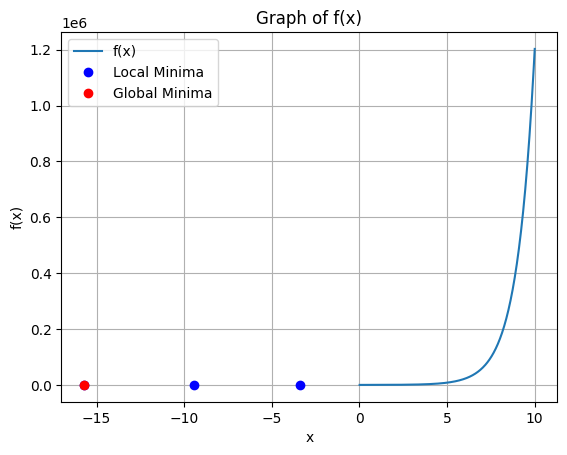

Global Minimum Point: (-15.724607818743785-0.028798904915202133j)
Value of f(x) at Global Minimum Point: (-2.9984178268071044-5.209080659155434j)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x + 4) + x**(2/3) + 8 * np.sin(x)

def f_prime(x):
    return np.exp(x + 4) + (2/3) * x**(-1/3) - 8 * np.sin(x)

def f_double_prime(x):
    return np.exp(x + 4) - (2/9) * x**(-4/3) - 8 * np.cos(x)

def newton_raphson(x_initial, epsilon=0.001, max_iterations=100):
    x_old = x_initial
    for _ in range(max_iterations):
        f_prime_val = f_prime(x_old)
        f_double_prime_val = f_double_prime(x_old)

        if abs(f_double_prime_val) < 1e-10:
            break

        x_new = x_old - f_prime_val / f_double_prime_val

        relative_error = abs(x_new - x_old) / abs(x_new)
        if relative_error < epsilon:
            return x_new

        x_old = x_new

    return x_old


x_vals = np.linspace(-10, 10, 1000)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x)')
plt.grid(True)


initial_values = [-8, -5, -2, 2, 5]
minima = []
for initial in initial_values:
    local_minimum = newton_raphson(initial)
    minima.append(local_minimum)

global_minima = min(minima, key=f)

plt.plot(minima, f(np.array(minima)), 'bo', label='Local Minima')
plt.plot(global_minima, f(global_minima), 'ro', label='Global Minima')
plt.legend()

plt.show()

print("Global Minimum Point:", global_minima)
print("Value of f(x) at Global Minimum Point:", f(global_minima))
